11
11 11


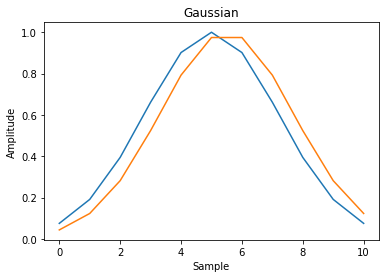

In [11]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

duration = 11
rel_sigma = 5

ga = signal.gaussian(duration, std=(duration)/rel_sigma)


# np.linspace(0, 49, 50)
x = np.arange(0,duration,1)
ex = np.exp(-(1/2)*(((x-(duration-1)/2)**2)/(((duration)/rel_sigma)**2)))

print(len(ga))
print(len(x),len(ex))

plt.plot(ga)
plt.plot(ex)
plt.title(r"Gaussian")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()


In [ ]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np

duration = 50
rel_sigma = 7

envelope = signal.gaussian(duration, std=duration/rel_sigma)

plt.plot(envelope)
plt.title(r"Gaussian envelope ($\sigma$=7)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")




plt.figure()
A = fft(envelope, 2048) / (len(envelope)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Gaussian envelope ($\sigma$=7)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")


41
41


Text(0.5, 0, 'Normalized frequency [cycles per sample]')

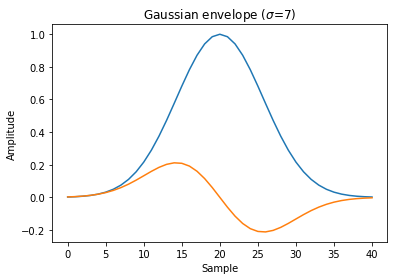

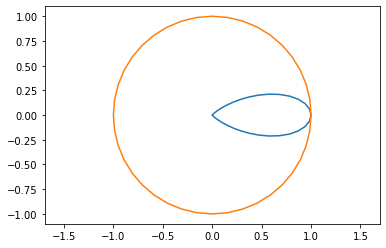

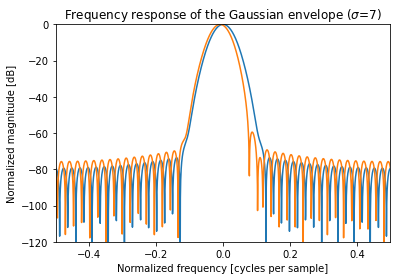

In [211]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np

duration = 40
rel_sigma = 7
beta = 2

envelope = signal.gaussian(duration+1, std=duration/rel_sigma)

# len(envelope)

# np.linspace(0, 49, 50)
x = np.arange(0,duration+1,1)
y = np.exp(-(1/2)*(((x-duration/2)**2)/((duration/rel_sigma)**2)))
q = beta*(-(x-duration/2)/((duration/rel_sigma)**2))*y
print(len(q))
print(len(envelope))


plt.plot(envelope)
plt.plot(q)
plt.title(r"Gaussian envelope ($\sigma$=7)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()
plt.plot(envelope,q)
plt.plot(np.cos(2*np.pi*x/duration), np.sin(2*np.pi*x/duration))
plt.axis("equal")



plt.figure()
def freq_response(fn):
    A = np.fft.fft(fn, 2048) / (len(fn)/2.0)
    return  np.linspace(-0.5, 0.5, len(A)), 20 * np.log10(np.abs(fftshift(A / abs(A).max())))

freq, response = freq_response(y)
plt.plot(freq, response)

freq, response = freq_response(y+ 1j*q)
plt.plot(freq, response)

plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Gaussian envelope ($\sigma$=7)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")


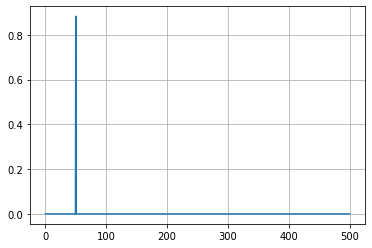

In [137]:
from scipy.fft import fft, fftfreq

# Number of sample points
N = 2000
duration = 2000
rel_sigma = 1
freq = 50.0

# sample spacing
T = 1.0 / 1000.0
x = np.linspace(0.0, N*T, N, endpoint=False)
# y = np.sin(freq * 2.0*np.pi*x) + 0.5*np.sin(100.0 * 2.0*np.pi*x)
#y = np.cos(freq * 2.0*np.pi*x) + 1j * np.sin(freq * 2.0*np.pi*x) + np.cos(100.0 * 2.0*np.pi*x)

y = np.exp(-(1/2)*(((x-duration/2)**2)/((duration/rel_sigma)**2))) * (np.cos(freq * 2.0*np.pi*x) + 1j * np.sin(freq * 2.0*np.pi*x) )

yf = fft(y)
xf = fftfreq(N, T)[:N//2]
# print(yf)
import matplotlib.pyplot as plt

#plt.plot(xf, 20 * np.log10(1.0/N * np.abs(yf[0:N//2])))
plt.plot(xf, 1.0/N * np.abs(yf[0:N//2]))
plt.grid()
#lt.axis([-0, 150, 0, 1])
plt.show()
#print(yf)

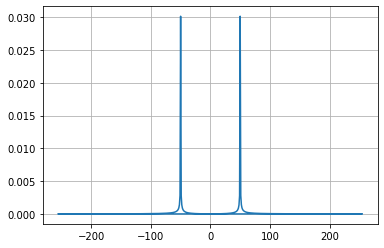

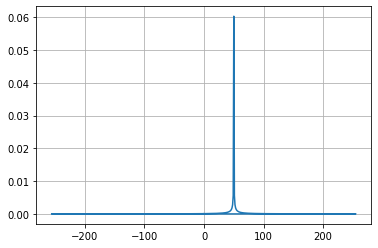

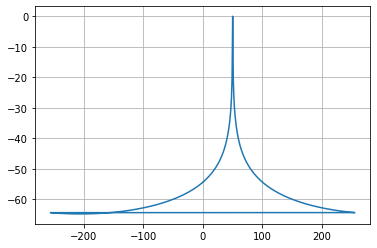

In [224]:
from numpy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt

# Number of sample points
N = 512
duration = 20
rel_sigma = 5
freq = 50

# sample spacing
T = 1.0 / 512.0
x = np.linspace(0.0, N*T, N, endpoint=False)

y = np.exp(-(1/2)*(((x-duration/2)**2)/((duration/rel_sigma)**2))) * (np.cos(freq * 2.0*np.pi*x) )

yf = fft(y)
xf = fftfreq(N, T)



plt.plot(xf, 1.0/N * np.abs(yf))
plt.grid()
plt.show()

plt.figure()

y = np.exp(-(1/2)*(((x-duration/2)**2)/((duration/rel_sigma)**2))) * (np.cos(freq * 2.0*np.pi*x) + 1j * np.sin(freq * 2.0*np.pi*x) )

yf = fft(y) / N / 1
#yf = fft(y, 2048) / N / 1
xf = fftfreq(N, T)

plt.plot(xf, np.abs(yf))
plt.grid()
plt.show()

plt.figure()
#xf = np.linspace(-0.5, 0.5, len(yf))
plt.plot(xf, 20 * np.log10(np.abs(yf)/np.abs(yf).max()))
plt.grid()
#plt.axis([freq-20, freq+20, -100, 0])
plt.show()
